# Insurance fraud prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [2]:
columns_name=['months','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable',
              'policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level',
              'insured_occupation','insured_hobbies','insured_relationship','capital_gain','capital_loss',
              'incident_date','incident_type','collision_type','collision_severity','authorities_contacted',
              'incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles',
              'property_damage','bodily_injuries','witnesses','police_report','claim_amount','injuries_claim',
              'property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_report' ]

In [3]:
df=pd.read_csv('Insurance fraud',names=columns_name)

In [4]:
df.head()

,months,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report,claim_amount,injuries_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_report
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
df.tail()

,months,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report,claim_amount,injuries_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_report
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months                    1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   policy_number             1000 non-null   int64  
 3   policy_bind_date          1000 non-null   object 
 4   policy_state              1000 non-null   object 
 5   policy_csl                1000 non-null   object 
 6   policy_deductable         1000 non-null   int64  
 7   policy_annual_premium     1000 non-null   float64
 8   umbrella_limit            1000 non-null   int64  
 9   insured_zip               1000 non-null   int64  
 10  insured_sex               1000 non-null   object 
 11  insured_education_level   1000 non-null   object 
 12  insured_occupation        1000 non-null   object 
 13  insured_hobbies           1000 non-null   object 
 14  insured_r

In [7]:
# There is no null value in this dataset. Some columns are object type, some are integer and only one is float.

In [9]:
df.isnull().sum()

months                      0
age                         0
policy_number               0
policy_bind_date            0
policy_state                0
policy_csl                  0
policy_deductable           0
policy_annual_premium       0
umbrella_limit              0
insured_zip                 0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
capital_gain                0
capital_loss                0
incident_date               0
incident_type               0
collision_type              0
collision_severity          0
authorities_contacted       0
incident_state              0
incident_city               0
incident_location           0
incident_hour_of_the_day    0
number_of_vehicles          0
property_damage             0
bodily_injuries             0
witnesses                   0
police_report               0
claim_amount                0
injuries_claim              0
property_c

In [11]:
df.duplicated().sum()

0

In [13]:
df.isin([' ','-','na','?']).any()

months                      False
age                         False
policy_number               False
policy_bind_date            False
policy_state                False
policy_csl                  False
policy_deductable           False
policy_annual_premium       False
umbrella_limit              False
insured_zip                 False
insured_sex                 False
insured_education_level     False
insured_occupation          False
insured_hobbies             False
insured_relationship        False
capital_gain                False
capital_loss                False
incident_date               False
incident_type               False
collision_type               True
collision_severity          False
authorities_contacted       False
incident_state              False
incident_city               False
incident_location           False
incident_hour_of_the_day    False
number_of_vehicles          False
property_damage              True
bodily_injuries             False
witnesses     

In [14]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [15]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [16]:
df['police_report'].value_counts()

?      343
NO     343
YES    314
Name: police_report, dtype: int64

In [17]:
df=df.replace('?',np.NaN)

In [18]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report']=df['police_report'].fillna(df['police_report'].mode()[0])

In [19]:
df.isnull().sum()

months                      0
age                         0
policy_number               0
policy_bind_date            0
policy_state                0
policy_csl                  0
policy_deductable           0
policy_annual_premium       0
umbrella_limit              0
insured_zip                 0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
capital_gain                0
capital_loss                0
incident_date               0
incident_type               0
collision_type              0
collision_severity          0
authorities_contacted       0
incident_state              0
incident_city               0
incident_location           0
incident_hour_of_the_day    0
number_of_vehicles          0
property_damage             0
bodily_injuries             0
witnesses                   0
police_report               0
claim_amount                0
injuries_claim              0
property_c

In [20]:
df.describe()

,months,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gain,capital_loss,incident_hour_of_the_day,number_of_vehicles,bodily_injuries,witnesses,claim_amount,injuries_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [21]:
categorical=[]
numerical=[]
for i in df.columns:
    if df[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

In [22]:
print(categorical)
print(numerical)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'collision_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report', 'auto_make', 'auto_model', 'fraud_report']
['months', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital_gain', 'capital_loss', 'incident_hour_of_the_day', 'number_of_vehicles', 'bodily_injuries', 'witnesses', 'claim_amount', 'injuries_claim', 'property_claim', 'vehicle_claim', 'auto_year']


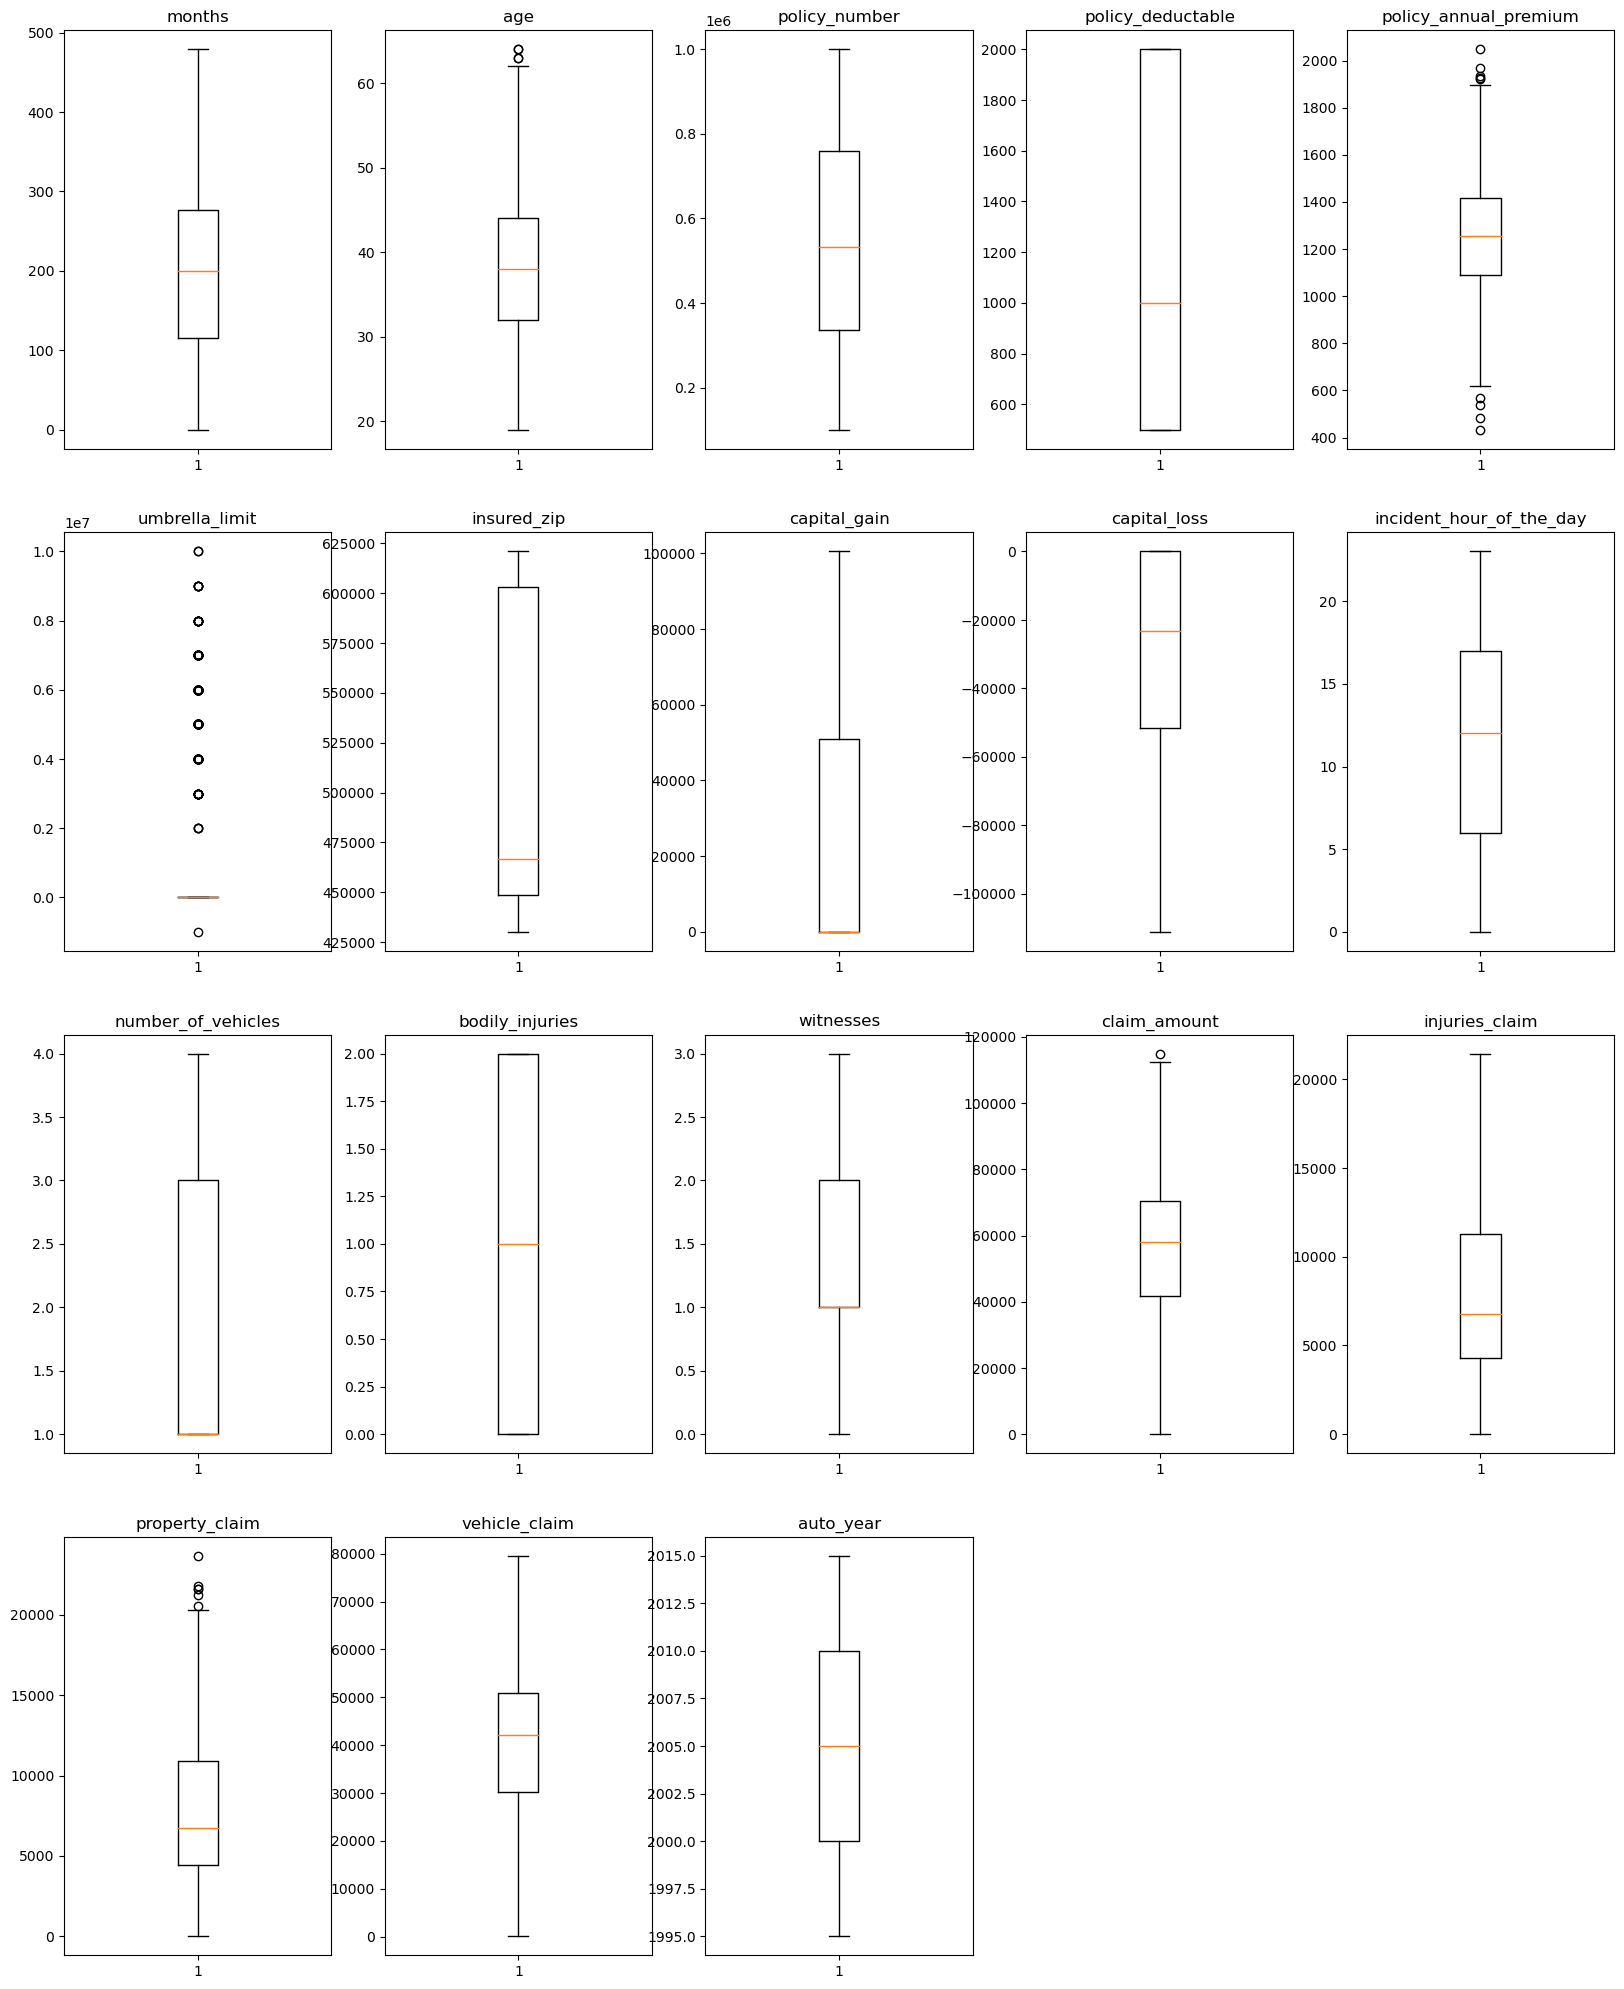

In [23]:
plt.figure(figsize=(20,25))
plot=1
for i in numerical:
    if plot<=18:
        plt.subplot(4,5,plot)
        plt.boxplot(df[i])
        plt.title(i)
    plot+=1
plt.show()

In [24]:
# Not so much outliers are there.

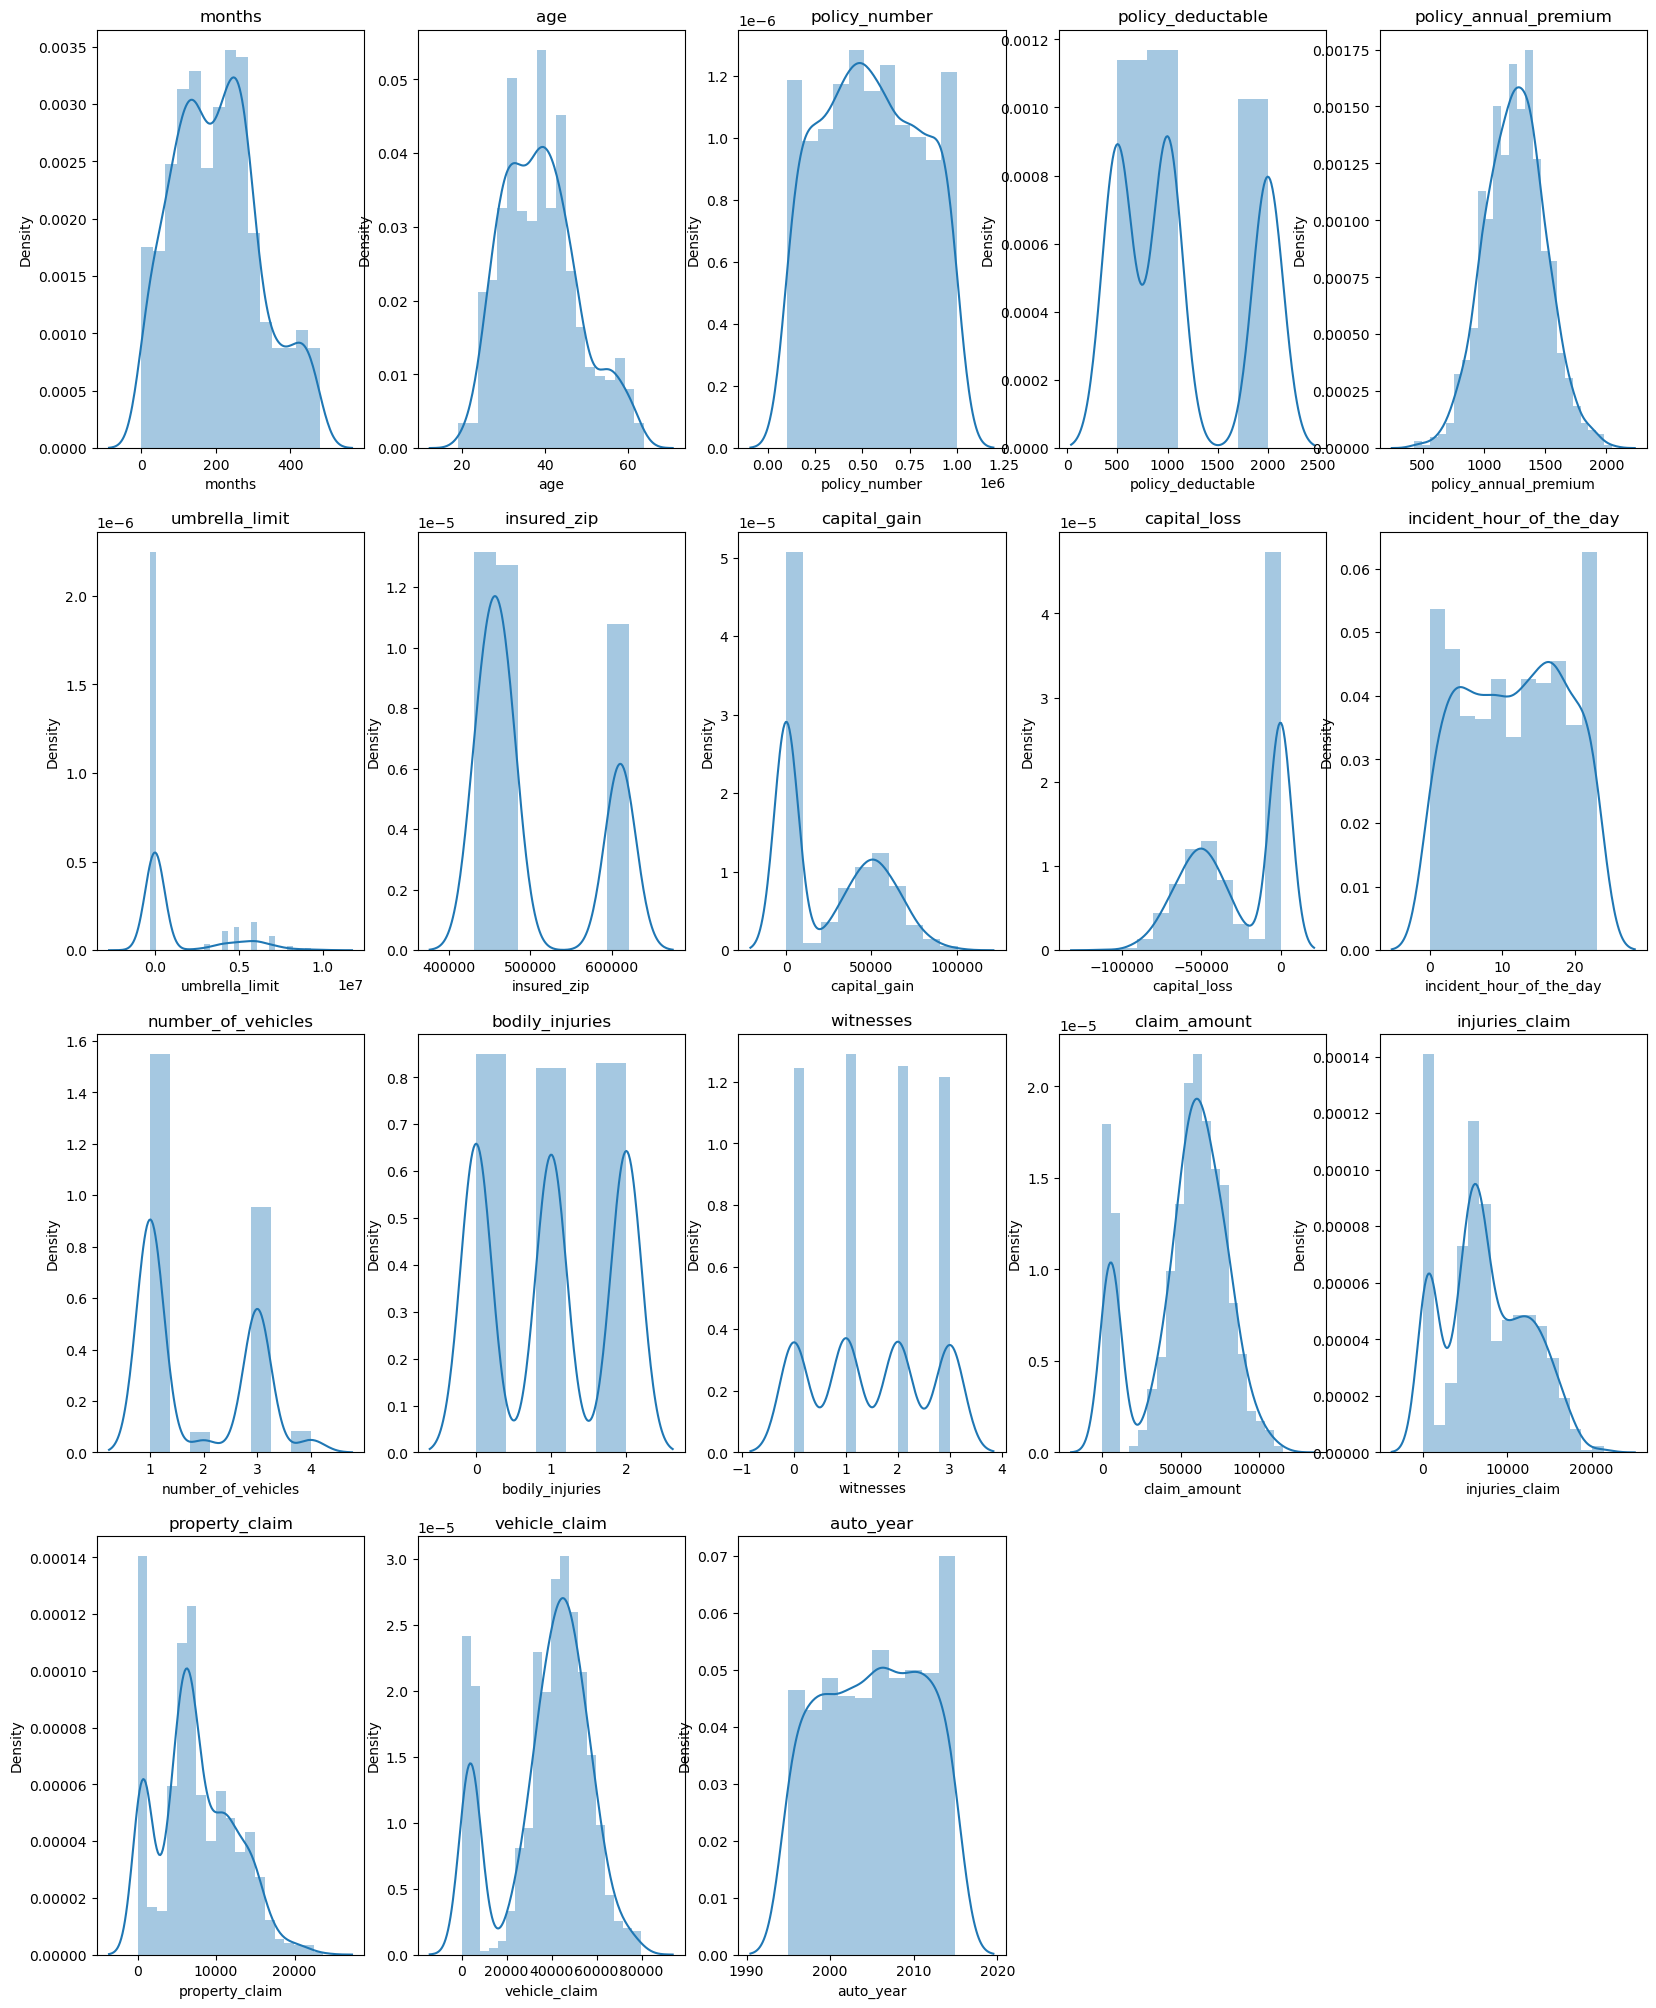

In [25]:
plt.figure(figsize=(20,25))
plot=1
for i in numerical:
    if plot<=18:
        plt.subplot(4,5,plot)
        sns.distplot(df[i])
        plt.title(i)
    plot+=1
plt.show()

In [26]:
df.skew()

months                      0.362177
age                         0.478988
policy_number               0.038991
policy_deductable           0.477887
policy_annual_premium       0.004402
umbrella_limit              1.806712
insured_zip                 0.816554
capital_gain                0.478850
capital_loss               -0.391472
incident_hour_of_the_day   -0.035584
number_of_vehicles          0.502664
bodily_injuries             0.014777
witnesses                   0.019636
claim_amount               -0.594582
injuries_claim              0.264811
property_claim              0.378169
vehicle_claim              -0.621098
auto_year                  -0.048289
dtype: float64

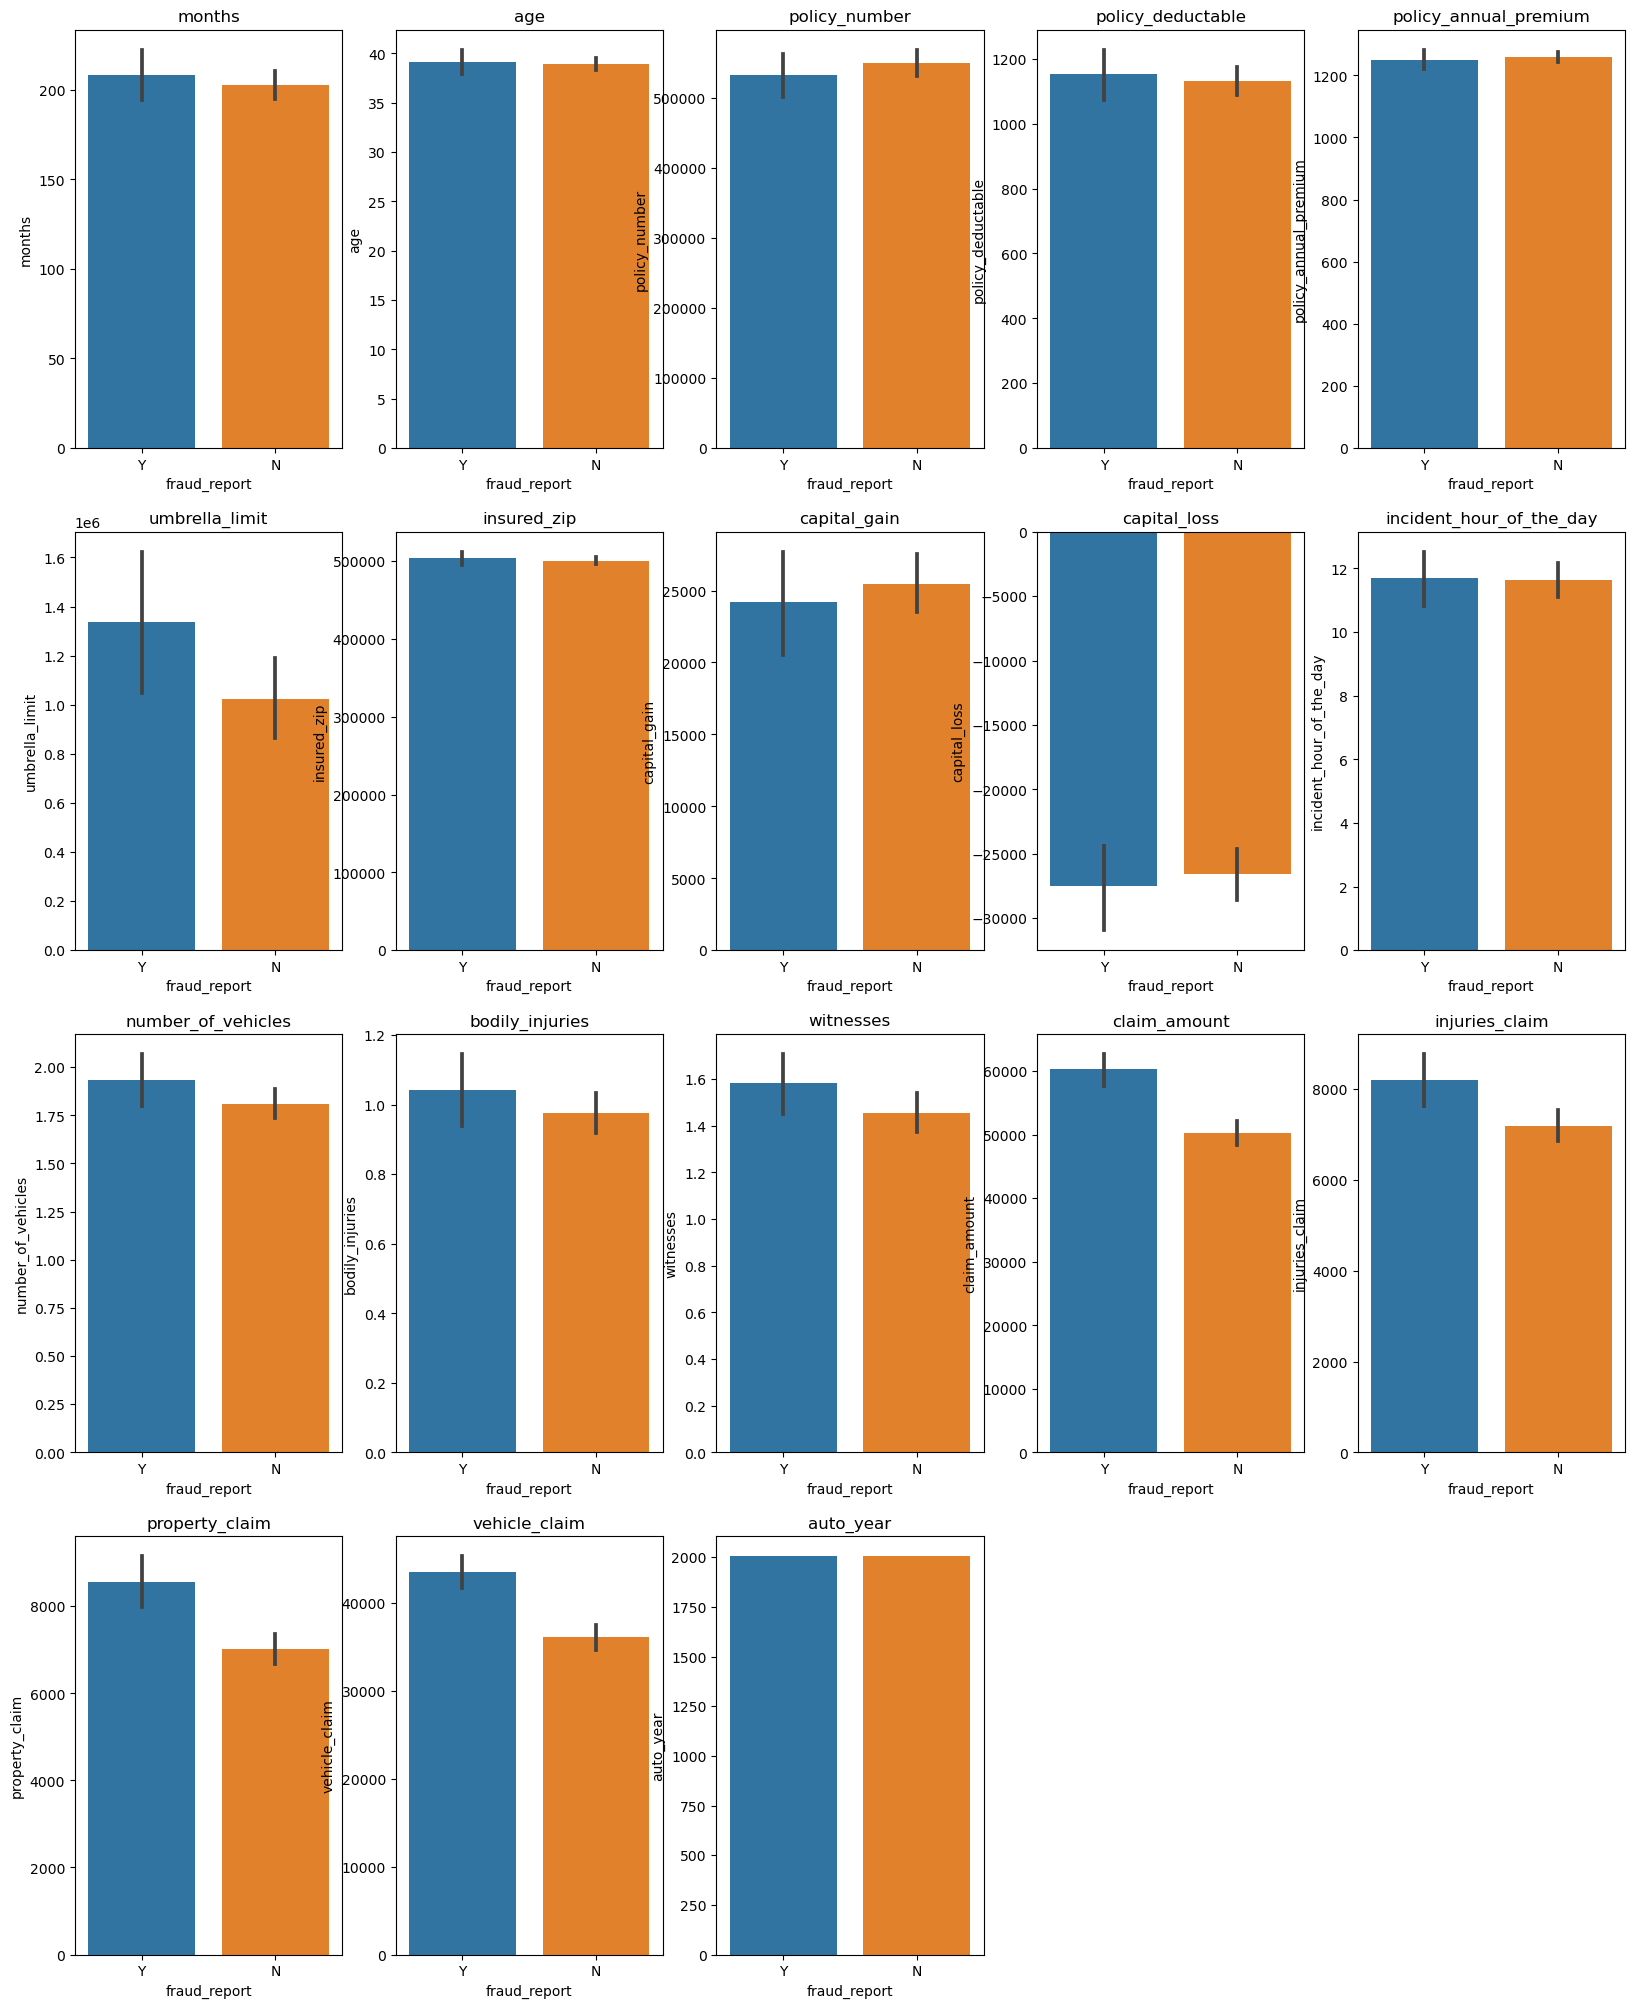

In [28]:
plt.figure(figsize=(20,25))
plot=1
for i in numerical:
    if plot<=20:
        plt.subplot(4,5,plot)
        sns.barplot(x=df['fraud_report'],y=df[i])
        plt.title(i)
    plot+=1
plt.show()

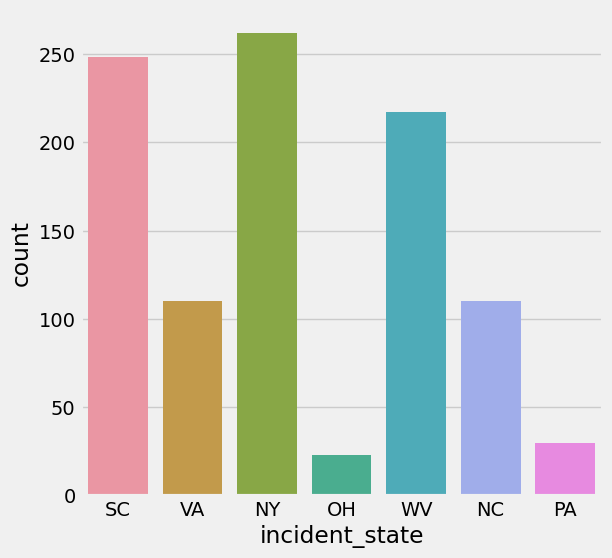

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,6))
ax = sns.countplot(x='incident_state', data=df)

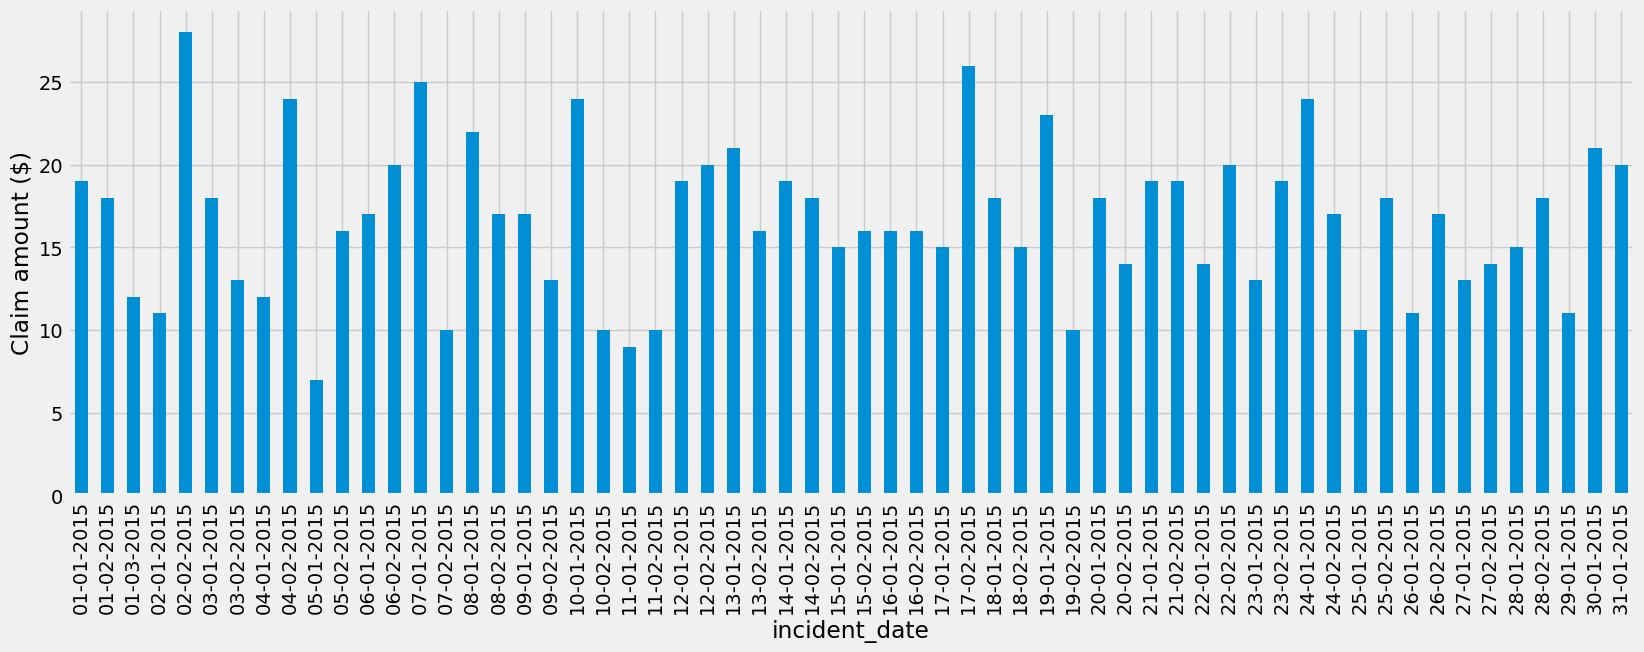

In [30]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').claim_amount.count().plot.bar()
ax.set_ylabel('Claim amount ($)')
plt.show()

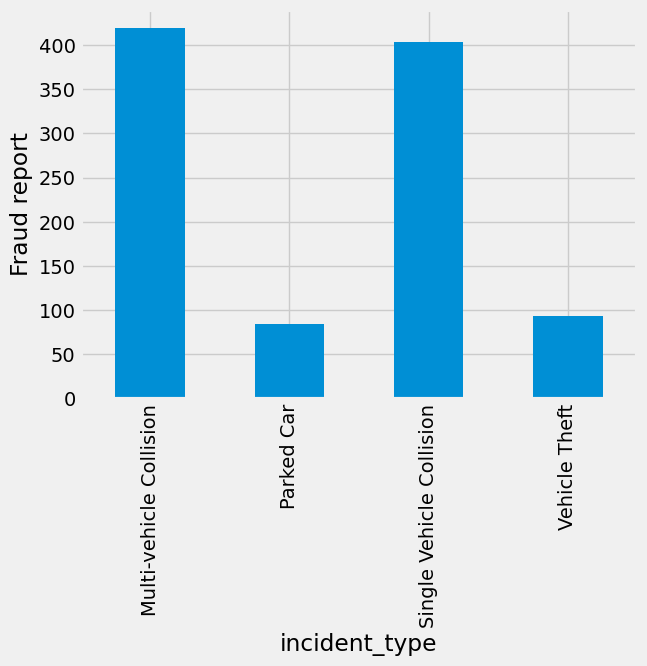

In [31]:
ax = df.groupby('incident_type').fraud_report.count().plot.bar()
plt.xticks(rotation='vertical')
ax.set_ylabel('Fraud report')
plt.show()

In [32]:
df['fraud_report']=df['fraud_report'].replace({'Y':1,'N':0})

<Axes: >

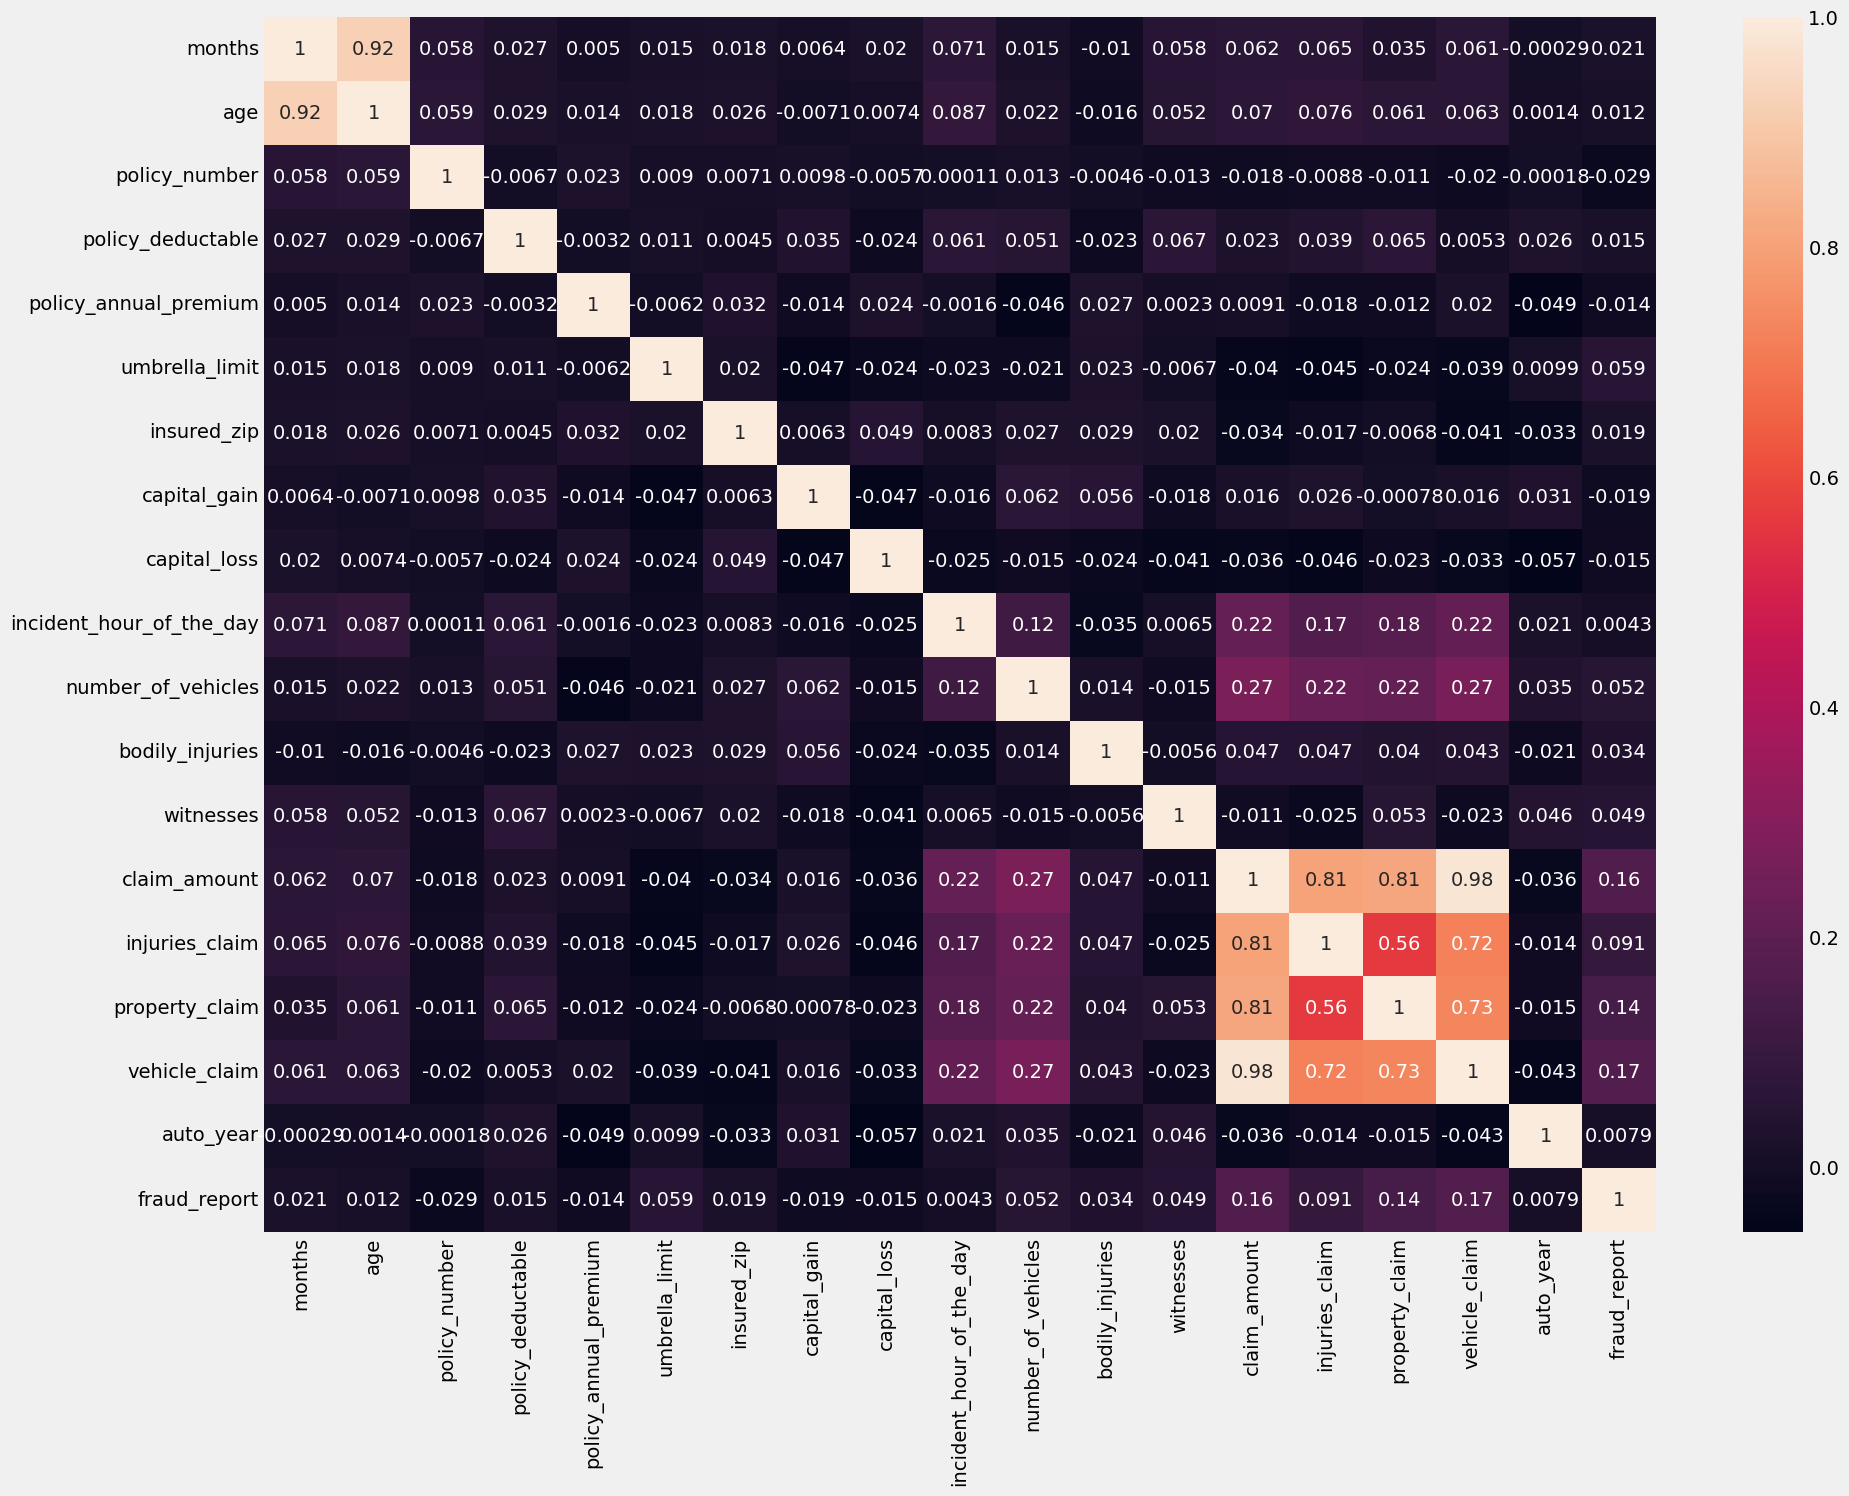

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [34]:
from sklearn.preprocessing import LabelEncoder 

In [35]:
lb=LabelEncoder()
list_encode=[ 'policy_state','policy_csl','insured_sex','insured_education_level','insured_relationship',
             'incident_type','collision_type','collision_severity','authorities_contacted', 'property_damage',
             'police_report']
for i in list_encode:
    df[i]=lb.fit_transform(df[i])

In [36]:
df.head()

,months,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report,claim_amount,injuries_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_report
0,328,48,521585,17-10-2014,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0


In [37]:
df = df.drop( ['policy_number','insured_zip','policy_bind_date','incident_date','incident_location','auto_year',
                        'auto_model','incident_hour_of_the_day'],axis=1)

In [38]:
df[['auto_make','fraud_report']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_report', ascending = False)

,auto_make,fraud_report
8,Mercedes,0.338462
5,Ford,0.305556
1,Audi,0.304348
13,Volkswagen,0.279412
2,BMW,0.277778
3,Chevrolet,0.276316
6,Honda,0.254545
4,Dodge,0.250000
11,Suburu,0.237500
10,Saab,0.225000


In [39]:
df['auto_make'] = df['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

In [41]:
df[['incident_city','fraud_report']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_report', ascending = False)

,incident_city,fraud_report
0,Arlington,0.289474
1,Columbus,0.261745
2,Hillsdale,0.248227
6,Springfield,0.242038
3,Northbend,0.234483
5,Riverwood,0.223881
4,Northbrook,0.221311


In [42]:
df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

In [44]:
df[['incident_state','fraud_report']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_report', ascending = False)

,incident_state,fraud_report
2,OH,0.434783
0,NC,0.309091
4,SC,0.294355
3,PA,0.266667
5,VA,0.227273
1,NY,0.221374
6,WV,0.179724


In [45]:
df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))


In [46]:
df[['insured_hobbies','fraud_report']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_report', ascending = False)

,insured_hobbies,fraud_report
5,chess,0.826087
6,cross-fit,0.742857
19,yachting,0.301887
2,board-games,0.291667
14,polo,0.276596
15,reading,0.265625
0,base-jumping,0.265306
10,hiking,0.230769
13,paintball,0.228070
16,skydiving,0.224490


In [47]:
df['insured_hobbies'] = df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

In [48]:
df[['insured_occupation','fraud_report']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_report', ascending = False)

,insured_occupation,fraud_report
3,exec-managerial,0.368421
4,farming-fishing,0.301887
2,craft-repair,0.297297
13,transport-moving,0.291667
12,tech-support,0.282051
11,sales,0.276316
1,armed-forces,0.246377
6,machine-op-inspct,0.236559
10,protective-serv,0.222222
9,prof-specialty,0.211765


In [49]:
df['insured_occupation'] = df['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))

In [51]:
x = df.drop(['fraud_report'], axis = 1)
y = df['fraud_report']


In [52]:
# Scaling
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)

In [54]:
x

,months,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles,property_damage,bodily_injuries,witnesses,police_report,claim_amount,injuries_claim,property_claim,vehicle_claim,auto_make
0,1.078140,0.990836,1.187173,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-0.840521,...,-0.823865,1.520282,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.385471
1,0.208995,0.334073,-0.016856,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,0.163286,...,-0.823865,-0.657773,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,-1.759285
2,-0.608002,-1.088913,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,-0.505919,...,1.140056,-0.657773,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.004484
3,0.452355,0.224613,-1.220886,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-0.004015,...,-0.823865,-0.657773,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.394440
4,0.208995,0.552994,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,-0.505919,...,-0.823865,-0.657773,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,0.970405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-0.840521,...,-0.823865,1.520282,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.199462
996,0.704407,0.224613,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.497888,...,-0.823865,1.520282,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,-0.784396
997,-0.642767,-0.541611,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-0.004015,...,1.140056,-0.657773,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,0.190493
998,2.208028,2.523284,-1.220886,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,0.665190,...,-0.823865,-0.657773,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.174351


In [55]:
df['fraud_report'].value_counts()

0    753
1    247
Name: fraud_report, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X,Y=smt.fit_resample(x,y)

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=42)

In [58]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1054, 30)
(452, 30)
(1054,)
(452,)


In [59]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
pred=lg.predict(xtest)
print(accuracy_score(ytest, pred))
print('\n')
print(confusion_matrix(ytest, pred))
print('\n')
print(classification_report(ytest, pred))

0.8296460176991151


[[169  47]
 [ 30 206]]


              precision    recall  f1-score   support

           0       0.85      0.78      0.81       216
           1       0.81      0.87      0.84       236

    accuracy                           0.83       452
   macro avg       0.83      0.83      0.83       452
weighted avg       0.83      0.83      0.83       452



In [60]:
# preparing other models
model=[ SVC(),GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(),RandomForestClassifier()]
        
for m in model:
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    print(m)
    print(accuracy_score(ytest, pred))
    print('\n')
    print(confusion_matrix(ytest, pred))
    print('\n')
    print(classification_report(ytest, pred))


SVC()
0.8827433628318584


[[180  36]
 [ 17 219]]


              precision    recall  f1-score   support

           0       0.91      0.83      0.87       216
           1       0.86      0.93      0.89       236

    accuracy                           0.88       452
   macro avg       0.89      0.88      0.88       452
weighted avg       0.89      0.88      0.88       452

GaussianNB()
0.7942477876106194


[[160  56]
 [ 37 199]]


              precision    recall  f1-score   support

           0       0.81      0.74      0.77       216
           1       0.78      0.84      0.81       236

    accuracy                           0.79       452
   macro avg       0.80      0.79      0.79       452
weighted avg       0.80      0.79      0.79       452

DecisionTreeClassifier()
0.8362831858407079


[[182  34]
 [ 40 196]]


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       216
           1       0.85      0.83      0.84       236



In [62]:
# Best model is Random Forest
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
predic=rfc.predict(xtest)
print(accuracy_score(ytest, predic))
print('\n')
print(confusion_matrix(ytest, predic))
print('\n')
print(classification_report(ytest, predic))



0.8915929203539823


[[189  27]
 [ 22 214]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       216
           1       0.89      0.91      0.90       236

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



In [65]:
import joblib
joblib.dump(rfc,'fraud_insurance.obj')

['fraud_insurance.obj']